<a href="https://colab.research.google.com/github/q4quang/AIO-2024/blob/feature/card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_path = 'data/creditcard.csv'
df = pd.read_csv(dataset_path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,...,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [5]:
data = df.to_numpy()
X, y = data[:, :-1].astype(np.float64), data[:, -1].astype(np.uint8)

<ipython-input-5-2e5ff0d2a0e7>:2: RuntimeWarning: invalid value encountered in cast
  X, y = data[:, :-1].astype(np.float64), data[:, -1].astype(np.uint8)


### Add Bias Term to Features

In [6]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
X.shape, X_b.shape

((15936, 30), (15936, 31))

### One-Hot Encoding

In [7]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [8]:
val_size, test_size = 0.2, 0.125
random_state = 2
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

### Normalization

In [9]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

### Model

In [10]:
def softmax(z):
    exps = np.exp(z)
    return exps / np.sum(exps, axis=1, keepdims=True)

def predict(X, theta):
    return softmax(np.dot(X, theta))

def compute_loss(y_hat, y):
    return -np.sum(y * np.log(y_hat)) / y.size

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, y_hat - y) / y.size
    traintrt

def update_theta(theta, grad, lr):
    return theta - lr * grad

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    y_pred = np.argmax(y_hat, axis=1)
    y_true = np.argmax(y, axis=1)
    return np.mean(y_pred == y_true)

### Training

In [11]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

train_losses, train_accs, val_losses, val_accs = [], [], [], []
for epoch in range(epochs):
    train_batch_losses, train_batch_acc, val_batch_losses, val_batch_acc = [], [], [], []
    for i in range(0, X_train.shape[0], batch_size):
        X_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]

        # Forward pass
        y_hat = predict(X_batch, theta)
        loss = compute_loss(y_hat, y_batch)

        # Backward pass
        grad = compute_gradient(X_batch, y_batch, y_hat)
        theta = update_theta(theta, grad, lr)

        acc = compute_accuracy(X_batch, y_batch, theta)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_acc = compute_accuracy(X_val, y_val, theta)

        train_batch_losses.append(loss)
        train_batch_acc.append(acc)
        val_batch_losses.append(val_loss)
        val_batch_acc.append(val_acc)

    train_loss, train_acc = np.mean(train_batch_losses), np.mean(train_batch_acc)
    val_loss, val_acc = np.mean(val_batch_losses), np.mean(val_batch_acc)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f'Epoch {epoch + 1}/{epochs}, train loss: {train_loss:.3f}, val loss: {val_loss:.3f}, train acc: {train_acc:.3f}, val acc: {val_acc:.3f}')

Epoch 1/30, train loss: nan, val loss: nan, train acc: 0.806, val acc: 0.805
Epoch 2/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 3/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 4/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 5/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 6/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 7/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 8/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 9/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 10/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 11/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 12/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0.996
Epoch 13/30, train loss: nan, val loss: nan, train acc: 0.995, val acc: 0

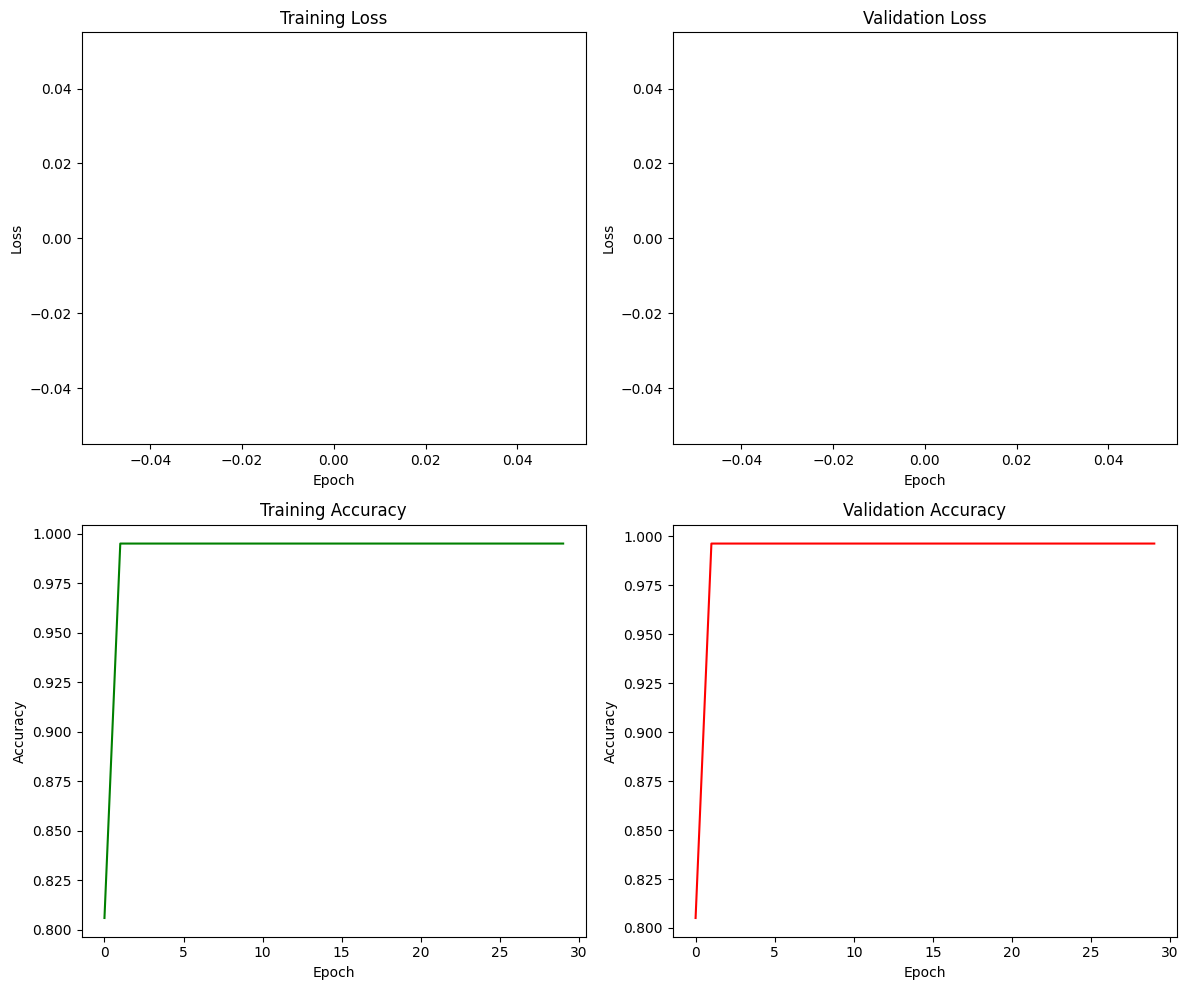

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, 'green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'red')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.tight_layout()
plt.show()

### Evaluation

In [13]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'val_acc: {val_set_acc:.4f}')
print(f'test_acc: {test_set_acc:.4f}')

Evaluation on validation and test set:
val_acc: 0.9962
test_acc: 0.9969
